<a href="https://colab.research.google.com/github/bundickm/DS-Unit-2-Sprint-2-Regression/blob/master/module2-polynomial-multiple-regression/Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [0]:
pd.set_option('max_columns', 100)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [0]:
df['ln_Price'] = np.log(df['SalePrice'])

In [0]:
# sns.pairplot(df)

In [8]:
target = 'ln_Price'
numeric_columns = df.select_dtypes(include='number').columns
features = numeric_columns.drop([target, 'SalePrice', 'Id'])
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [9]:
df[features].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [0]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [0]:
df = df.dropna(subset=['GarageYrBlt','MasVnrArea'])

In [12]:
df[features].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [13]:
df[target].isnull().sum()

0

In [0]:
y = df[target]
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = (model.predict(X_test))
BaseRMSE = (np.sqrt(mean_squared_error(y_test,y_pred)))
BaseR2 = r2_score(y_test, y_pred)

In [17]:
#The Baseline
print('Root Mean Squared Error', BaseRMSE)
print('R^2 Score', BaseR2)
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, X_train.columns)
print(coefficients.to_string())

Root Mean Squared Error 0.13822167076985967
R^2 Score 0.8732161898771864
Intercept 18.3674061689141
MSSubClass      -0.000822
LotFrontage     -0.000162
LotArea          0.000002
OverallQual      0.082921
OverallCond      0.049143
YearBuilt        0.002871
YearRemodAdd     0.000695
MasVnrArea       0.000029
BsmtFinSF1       0.000015
BsmtFinSF2       0.000015
BsmtUnfSF        0.000004
TotalBsmtSF      0.000035
1stFlrSF         0.000040
2ndFlrSF         0.000025
LowQualFinSF     0.000070
GrLivArea        0.000134
BsmtFullBath     0.065940
BsmtHalfBath     0.033314
FullBath         0.046409
HalfBath         0.015898
BedroomAbvGr    -0.011862
KitchenAbvGr    -0.085583
TotRmsAbvGrd     0.018620
Fireplaces       0.052783
GarageYrBlt      0.000060
GarageCars       0.079248
GarageArea       0.000017
WoodDeckSF       0.000133
OpenPorchSF      0.000044
EnclosedPorch    0.000127
3SsnPorch        0.000167
ScreenPorch      0.000404
PoolArea        -0.000360
MiscVal          0.000002
MoSold          

In [0]:
df['TotalBath'] = (df['FullBath'] + (.5*df['HalfBath']))
df = df[df['TotalBath'] != 0]

In [0]:
df['BedBathRatio'] = df['BedroomAbvGr']/df['TotalBath']

In [0]:
df['AgeAtSell'] = df['YrSold'] - df['YearBuilt']

In [0]:
df['AdjustedAgeAtSell'] = df['YrSold'] - df['YearRemodAdd']

In [0]:
df['AreaPerRoom'] = df['GrLivArea']/df['TotRmsAbvGrd']

In [0]:
df['LivPerLotArea'] = df['GrLivArea']/df['LotArea']

In [0]:
cat_vals = {'Gd':4, 'TA':2, 'Ex':5, 'Fa':3, np.NaN:0,'Po':1}
df['BsmtQual'] = df['BsmtQual'].replace(cat_vals)
df['ExterQual'] = df['ExterQual'].replace(cat_vals)
df['PoolQC'] = df['PoolQC'].replace(cat_vals)
df['HeatingQC'] = df['HeatingQC'].replace(cat_vals)
df['KitchenQual'] = df['KitchenQual'].replace(cat_vals)
df['FireplaceQu'] = df['FireplaceQu'].replace(cat_vals)
df['GarageQual'] = df['GarageQual'].replace(cat_vals)

df['AvgFeatQual'] = (df['BsmtQual']+df['ExterQual']+df['PoolQC']+df['HeatingQC']
                     +df['KitchenQual']+df['FireplaceQu']+df['GarageQual'])/7

In [0]:
df['ExterCond'] = df['ExterCond'].replace(cat_vals)
df['BsmtCond'] = df['BsmtCond'].replace(cat_vals)
df['GarageCond'] = df['GarageCond'].replace(cat_vals)

df['AvgFeatCond'] = (df['ExterCond']+df['BsmtCond']+
                     df['HeatingQC']+df['GarageCond'])/4

In [0]:
df['LandSlope'] = df['LandSlope'].replace({'Gtl':3,'Mod':2,'Sev':1})

In [0]:
df['CentralAir'] = df['CentralAir'].replace({'Y':1,'N':0})

In [0]:
df['OverallQual^2'] = df['OverallQual']**2

In [0]:
df['TotRmsAbvGrd^2'] = df['TotRmsAbvGrd']**2

In [30]:
df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'AdjustedAgeAtSell', 'AgeAtSell',
       'Alley', 'AreaPerRoom', 'AvgFeatCond', 'AvgFeatQual', 'BedBathRatio',
       'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LivPerLotArea', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature',

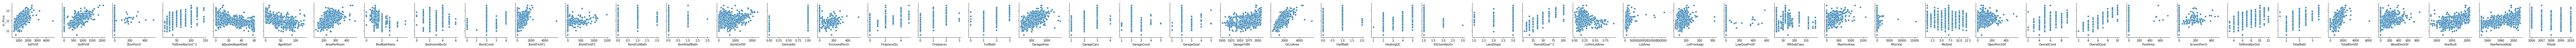

In [31]:
sns.pairplot(df,y_vars='ln_Price',x_vars=['1stFlrSF', '2ndFlrSF', '3SsnPorch', 
       'TotRmsAbvGrd^2', 'AdjustedAgeAtSell', 'AgeAtSell',
       'AreaPerRoom', 'BedBathRatio', 'BedroomAbvGr', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'CentralAir',
       'EnclosedPorch', 'FireplaceQu', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'LandSlope', 'OverallQual^2',
       'LivPerLotArea', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBath', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'YrSold']);

In [32]:
target = 'ln_Price'
numeric_columns = df.select_dtypes(include='number').columns
features = numeric_columns.drop([target, 'SalePrice', 'Id'])
df[features] = df[features].fillna(0)
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalBath',
       'BedBathRatio', 'AgeAtSell', 'AdjustedAgeAtSell', 'AreaPerRoom',
       'LivPerLotArea', 'OverallQual^2', 'TotRmsAbvGrd^2'],
      dtype='object')

In [0]:
y = df[target]
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = (model.predict(X_test))
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

In [36]:
print('Root Mean Squared Error:', rmse)
print('Base RMSE:', BaseRMSE)
print('Change in RMSE:', BaseRMSE-rmse)
print()
print('R^2 Score:', r2)
print('Base R^2:', BaseR2)
print('Change in R^2:', BaseR2-r2)
print()
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, X_train.columns)
print(coefficients.to_string())

Root Mean Squared Error: 0.1236458679135323
Base RMSE: 0.13822167076985967
Change in RMSE: 0.014575802856327369

R^2 Score: 0.8933361141477975
Base R^2: 0.8732161898771864
Change in R^2: -0.020119924270611045

Intercept 18.38133884766797
MSSubClass          -3.427794e-04
LotFrontage         -3.453110e-04
LotArea              6.935152e-07
LandSlope           -1.457944e-02
OverallQual         -2.927143e-02
OverallCond          5.449077e-02
YearBuilt            1.195272e-04
YearRemodAdd        -1.296851e-03
MasVnrArea           3.435846e-05
BsmtCond             1.613487e-04
BsmtFinSF1           3.007800e-05
BsmtFinSF2           2.592047e-05
BsmtUnfSF           -6.316772e-06
TotalBsmtSF          4.968169e-05
HeatingQC            1.057316e-02
CentralAir           4.297831e-02
1stFlrSF            -7.139027e-05
2ndFlrSF            -7.217325e-05
LowQualFinSF        -8.146447e-05
GrLivArea           -2.250280e-04
BsmtFullBath         5.127135e-02
BsmtHalfBath         1.424914e-02
FullBath      

In [0]:
# target = 'ln_Price'
# numeric_columns = df.select_dtypes(include='number').columns
# features = numeric_columns.drop([target, 'SalePrice', 'Id'])

# q1 = df.quantile(.25)
# q3 = df.quantile(.75)
# IQR = q3-q1
# df[(df[features]>q1) & (df[features]<q3)][features]

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data